In [1]:
import sys
sys.path.append("..")
import torch
import torch.utils.data
from torch.nn import functional as F
from omegaconf import OmegaConf
from ccreaim.model import operate
from ccreaim.utils import dataset, cfg_classes, audio_tools

In [2]:
data_tar = "/scratch/other/sopi/CCREAIM/datasets/test/out/8bit_test.tar"
load_transformer_path = "/scratch/other/sopi/CCREAIM/logs/2023-01-07/8bit-transformer_train_01-29-58/3/checkpoints/transformer_seqlen-1600_bs-32_lr-0.0001_seed-0_ep-004.pt"

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

checkpoint = torch.load(load_transformer_path, map_location="cpu")
model_state_dict = checkpoint["model_state_dict"]
hyper_cfg_schema = OmegaConf.structured(cfg_classes.HyperConfig)
conf = OmegaConf.create(checkpoint["hyper_config"])
hyper_cfg = OmegaConf.merge(hyper_cfg_schema, conf)
get_model = operate.get_model_init_function(hyper_cfg)
model = get_model()
model.load_state_dict(model_state_dict)
model = model.to(device)

In [4]:
tmp_data_root = dataset.prepare_dataset_on_tmp(data_tar=data_tar)
data = dataset.Audio8BitDataset(tmp_data_root, hyper_cfg.seq_len)
dl = torch.utils.data.DataLoader(data, batch_size=1, shuffle=False) 

/tmp/8bit_test/american_bach_soloists-j_s__bach__cantatas_volume_v-01-gleichwie_der_regen_und_schnee_vom_himmel_fallt_bwv_18_i_sinfonia-0-29_001.wav


In [10]:
sample, _ = next(iter(dl))
print(sample.size())

torch.Size([1, 1600])


In [17]:
sample, _ = next(iter(dl))
sample = sample.view(-1).unsqueeze(0)
audio_tools.play_audio(sample.unsqueeze(0), 16000)

In [14]:
with torch.inference_mode():
    seq = sample.to(device)
    src = F.one_hot(seq.long(), num_classes=256).int()
    src = src.to(device)[:,:160,:]
    gen = model.generate_chunks(src, 32, 32, 16)
    gen = gen.argmax(dim=-1)

160
5
torch.Size([1, 16, 256])
torch.Size([1, 32, 256])
torch.Size([1, 48, 256])
torch.Size([1, 64, 256])
 

         91723 function calls (86114 primitive calls) in 58.484 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2686   23.939    0.009   23.939    0.009 {built-in method torch._C._nn.linear}
     2528   16.300    0.006   16.300    0.006 {built-in method torch.dropout}
     1343    6.260    0.005    6.260    0.005 {built-in method torch.layer_norm}
     1185    5.713    0.005    5.713    0.005 {built-in method torch.bmm}
      711    2.498    0.004    2.498    0.004 {method 'softmax' of 'torch._C._TensorBase' objects}
      474    1.514    0.003    1.514    0.003 {built-in method torch.relu}
      237    1.307    0.006    1.307    0.006 {built-in method torch.baddbmm}
       79    0.382    0.005    0.382    0.005 {built-in method torch.tril}
      711    0.111    0.000   20.442    0.029 functional.py:4886(multi_head_attention_forward)
     2844    0.054    0.000    0.054    0.000 {method 'contiguous' of 'torch._C._Tenso

In [12]:
print(gen.size())

torch.Size([1, 80])


In [ ]:
with torch.inference_mode():
    seq = sample.to(device)
    src = F.one_hot(seq.long(), num_classes=256).int()
    src = src.to(device)
    gen = model.generate(src, None, feed_in_tokens=0, gen_tokens=)
    gen = gen.argmax(dim=-1)

torch.Size([1, 1600, 256])
torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 2, 256])
torch.Size([1, 1, 256]) torch.Size([1, 3, 256])
torch.Size([1, 1, 256]) torch.Size([1, 4, 256])
torch.Size([1, 1, 256]) torch.Size([1, 5, 256])
torch.Size([1, 1, 256]) torch.Size([1, 6, 256])
torch.Size([1, 1, 256]) torch.Size([1, 7, 256])
torch.Size([1, 1, 256]) torch.Size([1, 8, 256])
torch.Size([1, 1, 256]) torch.Size([1, 9, 256])
torch.Size([1, 1, 256]) torch.Size([1, 10, 256])
torch.Size([1, 1, 256]) torch.Size([1, 11, 256])
torch.Size([1, 1, 256]) torch.Size([1, 12, 256])
torch.Size([1, 1, 256]) torch.Size([1, 13, 256])
torch.Size([1, 1, 256]) torch.Size([1, 14, 256])
torch.Size([1, 1, 256]) torch.Size([1, 15, 256])
torch.Size([1, 1, 256]) torch.Size([1, 16, 256])
torch.Size([1, 1, 256]) torch.Size([1, 17, 256])
torch.Size([1, 1, 256]) torch.Size([1, 18, 256])
torch.Size([1, 1, 256]) torch.Size([1, 19, 256])
torch.Size([1, 1, 256]) tor

In [6]:
with torch.inference_mode():
    seq = sample.squeeze().to(device)
    src = F.one_hot(seq.long(), num_classes=256).int()
    src = src.to(device)
    tgt = torch.cat(
        (
            torch.zeros_like(src[:, 0:1, :], device=src.device),
            src[:, :-1, :],
        ),
        dim=1,
    )
    tgt_mask = model.get_tgt_mask(tgt.size(1))
    tgt_mask = tgt_mask.to(device)
    pred = model(src, tgt, tgt_mask=tgt_mask)
    pred_seq = pred.argmax(-1)

KeyboardInterrupt: 

In [10]:
orig_flat = sample.flatten().unsqueeze(0)
pred_flat = pred_seq.flatten().unsqueeze(0)

NameError: name 'pred_seq' is not defined

/scratch/other/sopi/conda/ccreaim/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7720: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


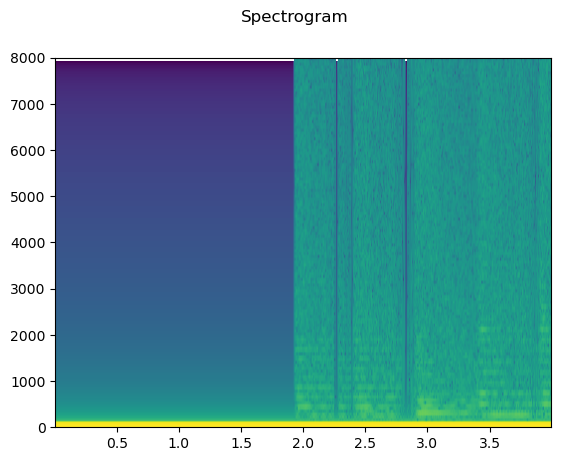

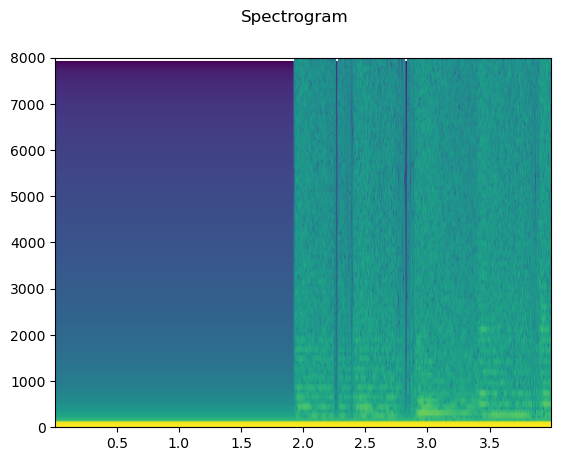

In [10]:
audio_tools.plot_specgram(orig_flat, 16000)
audio_tools.plot_specgram(pred_flat, 16000)

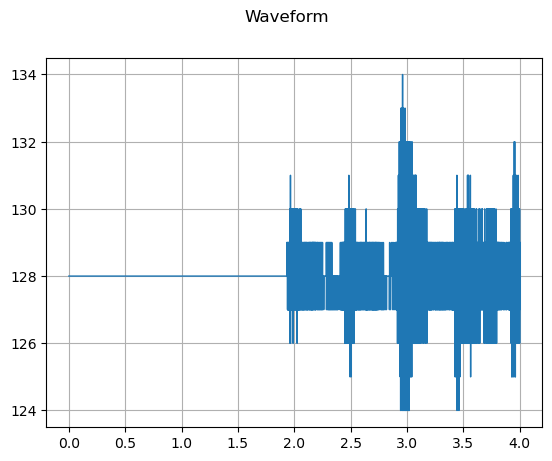

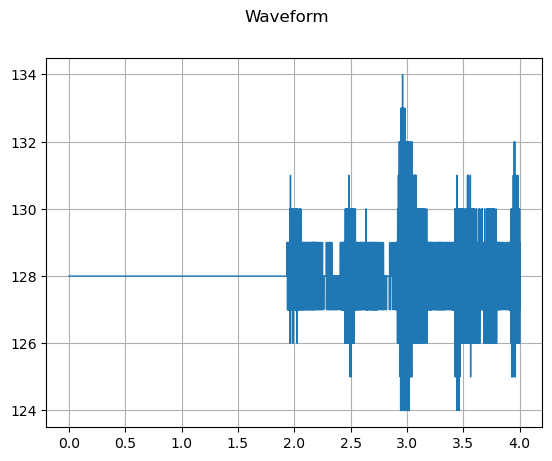

In [11]:
audio_tools.plot_waveform(orig_flat, 16000)
audio_tools.plot_waveform(pred_flat, 16000)

In [11]:
audio_tools.play_audio(orig_flat, 16000)
audio_tools.play_audio(pred_flat, 16000)

NameError: name 'pred_flat' is not defined

In [8]:
print(gen.size())	
audio_tools.play_audio(gen, 16000)

torch.Size([1, 3201])
